<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [69]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [70]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [71]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [72]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [73]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [74]:
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

Text(0, 0.5, 'Median Dollar Value ($100K)')

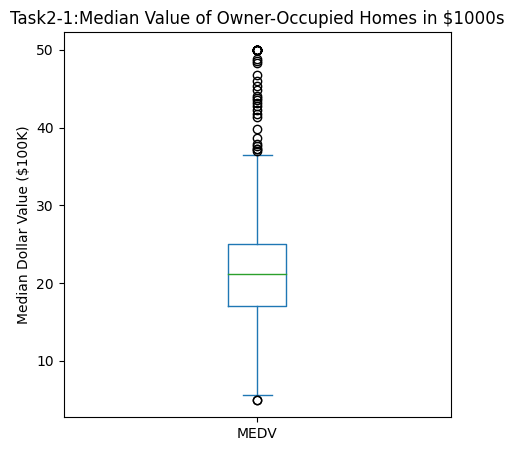

In [75]:
fig = plt.figure()
ax=fig.add_subplot()
boston_df['MEDV'].plot(kind='box',figsize=(5,5),title='Task2-1:Median Value of Owner-Occupied Homes in $1000s',ax=ax)
ax.set_ylabel('Median Dollar Value ($100K)')

##### Boxplot of Median house value shows the average a bit over $ 2mil, between $ 500k and $ 5mil.

In [76]:

boston_df['CHAS'].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

Text(0.5, 1.0, 'Task2-2:Mean Value of Home Value by Charles River')

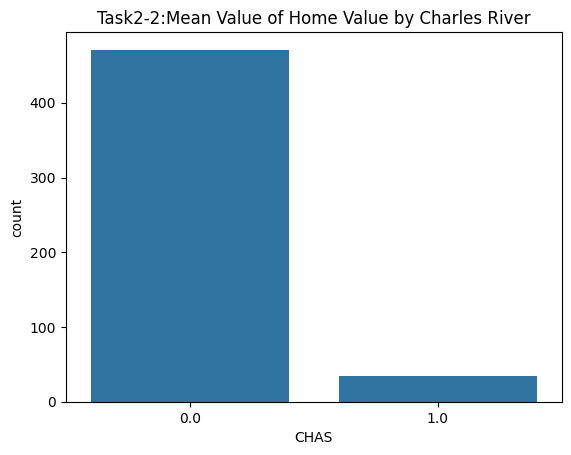

In [77]:
fig = plt.figure()
ax=fig.add_subplot()
sns.countplot(boston_df, x='CHAS',ax=ax)
ax.set_title('Task2-2:Mean Value of Home Value by Charles River')

In [78]:
boston_df['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

<AxesSubplot:ylabel='Frequency'>

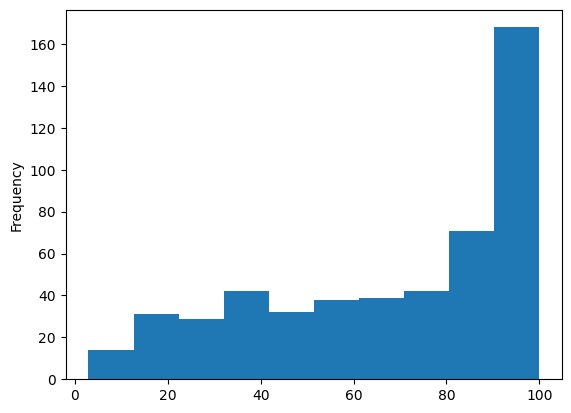

In [79]:
boston_df['AGE'].plot(kind='hist')

<ipython-input-80-230638ddf56d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df['AGE'])


<AxesSubplot:xlabel='AGE', ylabel='Density'>

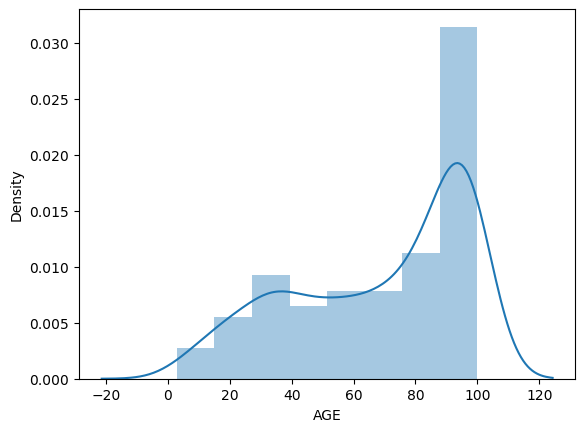

In [80]:
sns.distplot(boston_df['AGE'])

In [81]:
boston_df.loc[(boston_df['AGE'] < 35), 'age_group'] = '0< age <35'
boston_df.loc[(boston_df['AGE'] >= 35)&(boston_df['AGE'] < 70), 'age_group'] = '35 =< age <70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 =< age'

In [82]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
 14  age_group   506 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 57.4+ KB


Text(0, 0.5, 'Median Dollar Value ($100K)')

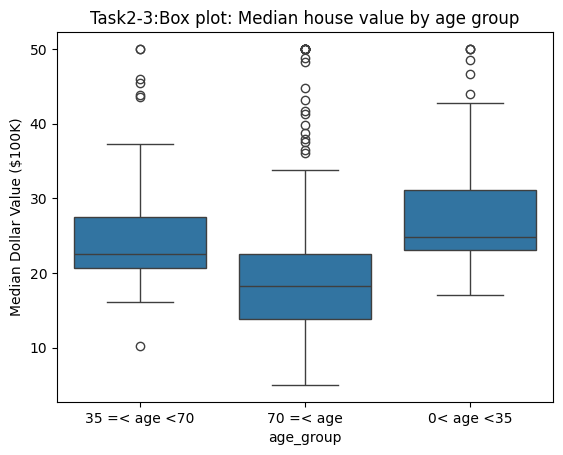

In [83]:
fig = plt.figure()
ax=fig.add_subplot()
sns.boxplot(boston_df,y='MEDV',x='age_group', ax=ax)
ax.set_title('Task2-3:Box plot: Median house value by age group')
ax.set_ylabel('Median Dollar Value ($100K)')

Text(0.5, 0, 'Nitric Oxide Concentration')

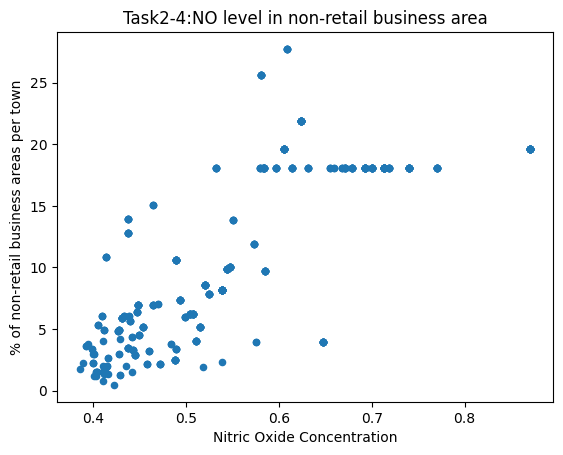

In [84]:
fig = plt.figure()
ax=fig.add_subplot()
boston_df.plot(kind='scatter', x='NOX', y='INDUS', ax=ax, title ='Task2-4:NO level in non-retail business area')
ax.set_ylabel('% of non-retail business areas per town')
ax.set_xlabel('Nitric Oxide Concentration')


Text(0.5, 1.0, 'Task2-5:Frequecy of pupil-teacher ratio by town')

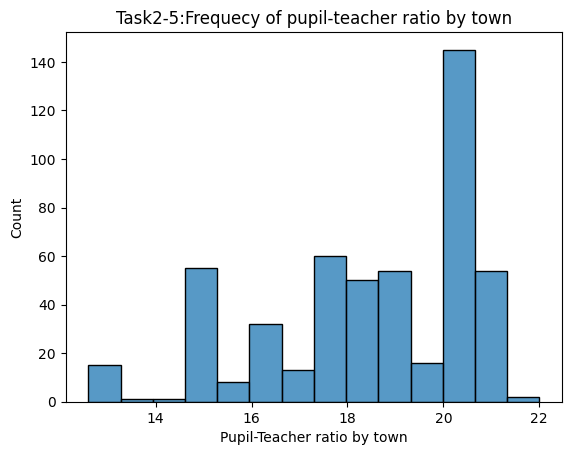

In [85]:
fig = plt.figure()
ax=fig.add_subplot()
sns.histplot(boston_df,x='PTRATIO',ax=ax)
ax.set_xlabel('Pupil-Teacher ratio by town')
ax.set_title('Task2-5:Frequecy of pupil-teacher ratio by town')

#### Task 3-1:
#### H0: There is no significant difference in median value of house by Charles river or not
#### H1: There is a significant difference in median value of house by Charles river or not

In [86]:
#task3-1
x = boston_df['CHAS']
y = boston_df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           7.39e-05
Time:                        09:24:26   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion of task 3-1
#### Independent sample t-test revealed that the houses bounded by the Charles river show significantly higher values than the ones not bounded by the river.
#### (t= 3.96, p <0.05)
#### We reject null hypothesis.

#### Task 3-2:
#### H0: There is no significant difference in median value of house for each proportion of owner occupied units built by age group.
#### H1: There is a significant difference in median value of house for each proportion of owner occupied units built by age group.

In [87]:
# task 3-2
from statsmodels.formula.api import ols
lm = ols('MEDV ~ age_group', data= boston_df).fit()
table=sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


### Conclusion of task 3-2
#### There is a significant effect of the age group on the median house value (F=36.4, p<0.05).
#### We reject null hypothesis.


#### Task 3-3:
#### H0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
#### H1: There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [88]:
# task 3-3
x= boston_df['NOX']
y= boston_df['INDUS']
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           7.91e-98
Time:                        09:24:32   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion of task 3-3:
#### There is a strong positive correlation between Nitric oxide level and non-retail business acres per town (r = 0.78, p<0.05).
#### We reject null hypothesis.

### Task 3-4:
#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [89]:
# task 3-4
x= boston_df['DIS']
y = boston_df['MEDV']
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions=model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        09:24:34   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion of task 3-4
#### There is a significant impact of an additional weighted disance to the five Boston employment centres on the median value of owner occupies homes (F=33.58, p <0.05).
#### This additional weighted distance to the five Boston employment centres has impact on the median value variation (6%).
